#  Anomaly detection method
https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

### 가우시안 베이직(상관관계 없음)

공분산 행렬:


array([[1.00200401, 0.013096  ],
       [0.013096  , 1.00200401]])

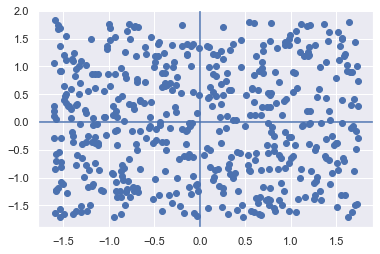

In [3]:
N = 500
x1 = np.random.rand(N); x2 = np.random.rand(N)
x1 = (x1- np.mean(x1))/np.std(x1); x2 = (x2- np.mean(x2))/np.std(x2)
plt.scatter(x1, x2)
plt.axvline(0); plt.axhline(0)
print(f'공분산 행렬:')
np.cov(np.vstack([x1, x2]))

### 가우시안 베이직(상관관계 있음)

공분산 행렬:


array([[1.00200401, 0.89961932],
       [0.89961932, 1.00200401]])

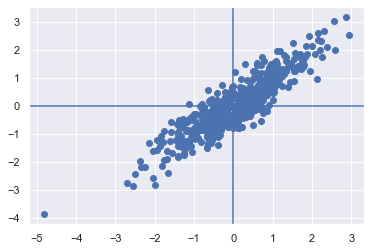

In [4]:
x1 = np.random.normal(0, 1, N); x2 = x1*2 + np.random.normal(0, 1, N)
x1 = (x1- np.mean(x1))/np.std(x1); x2 = (x2- np.mean(x2))/np.std(x2)
plt.scatter(x1, x2)
plt.axvline(0); plt.axhline(0)
print(f'공분산 행렬:')
np.cov(np.vstack([x1, x2]))

## Multivariate gaussian distribution
* 두 독립변수의 분포는 정규분포이고 negative(y=0) 데이터가 800개, positive(y=1) 데이터 200개 
* y의 클래스에 따라 모수가 달라

첫번째 모집단 평균과 :
\begin{vmatrix}
-2 \\
-2
\end{vmatrix}

공분산은
\begin{vmatrix}
1.0 & 0.9 & \\
0.9 & 2
\end{vmatrix}

In [5]:
from scipy.stats import norm
rv = norm() # Random variates Class
rv.pdf(1.96) # Probability density function. 평균 0 , 분산 1, Z-distribution

0.058440944333451476

In [6]:
import scipy.stats as stats
np.random.seed(13)

rv0 = stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = stats.multivariate_normal([2, 2], [[1.2, -0.5], [-0.5, 2]])
x0 = rv0.rvs(200); x1 = rv1.rvs(800) # it is a fitting! ()

Text(0.5, 1.0, '데이터의 확률분포')

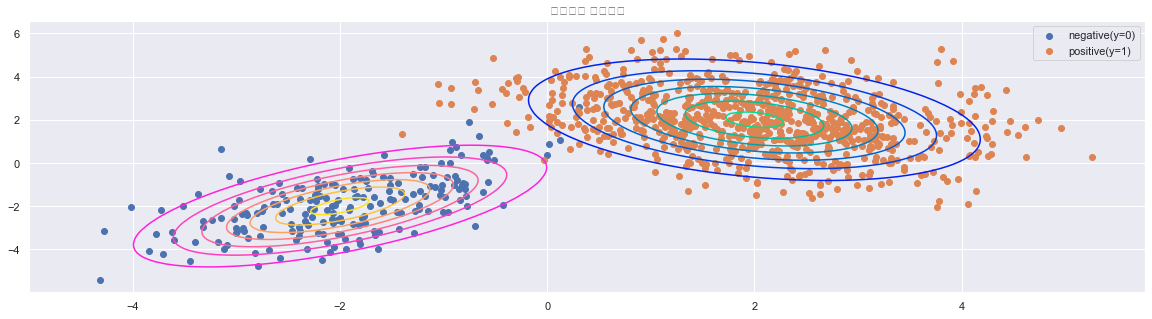

In [7]:
#X = np.vstack([x0, x1]); y = np.hstack([np.zeros(1000), np.ones(5000)])
xx1 = np.linspace(-5, 5, 100); xx2 = np.linspace(-5, 5, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)

fig = plt.figure(figsize=(20,5))
plt.contour(xx1, xx2, rv0.pdf(np.dstack([xx1, xx2])), cmap='spring')
plt.contour(xx1, xx2, rv1.pdf(np.dstack([xx1, xx2])), cmap='winter')
plt.scatter(x0[:, 0], x0[:, 1], label='negative(y=0)')
plt.scatter(x1[:, 0], x1[:, 1], label='positive(y=1)')
plt.legend(); plt.title("데이터의 확률분포")

plt.show()

### Outlier는 대부분의 데이터와는 다른 데이터(An unusal data point that differs significantly from other data points)

### 1. Outlier detection (Unsupervised Anomaly Detection)
#### outlier를 포함한 훈련데이터에서 outliers를 탐색
- An unlabeled dataset containing both inlier and outlier data points. These algorithms are built on the premise that inlier data points form high-density clusters and anomalies or outliers are located in low-density regions.
          * A labeled dataset with inliers and outlier data points where learning happens based on the labeled dataset provided for training.
- The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.

### 2. Novelty detection (Semi-Supervised Anamoly Detection)
#### 새로운 한번도 보지 못한 데이터가 outlier인지 아닌지 판단(훈련데이터에 outlier가 없음)
- Outliers do not pollute training data, and the anomaly detection algorithm only detects if the new observation is an inlier or an outlier. Built on the premise that outliers can form a high-density cluster as long as the normal data points in the training dataset form a low-density cluster
- The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.

### Anomaly detection은 outlier & novelty detection을 모두 호칭

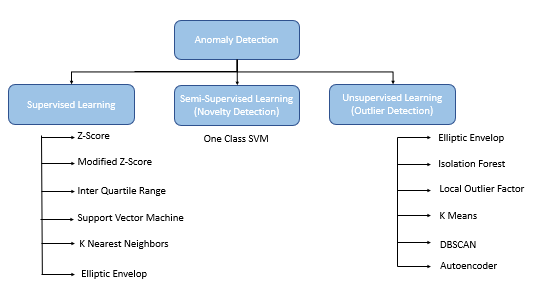

In [8]:
from IPython.display import Image
width=700; height=500
Image(filename='../../image/anomaly/types.png', width=width, height=height)

- In the context of outlier detection, the outliers/anomalies cannot form a dense cluster as available estimators assume that the outliers/anomalies are located in low density regions. 
- On the contrary, in the context of novelty detection, novelties/anomalies can form a dense cluster as long as they are in a low density region of the training data, considered as normal in this context.
- Applications
     * Data cleaning
     * Fraud detection like credit card frauds or security breaches
     * Health monitoring of people, systems, and machines

#  <font color='red'> Anomaly detection
## Supervised Learning

In [9]:
import pandas as pd
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

### Box plot으로 outlier 탐색(Interquartile Range, IQR)

단일 변수의 백분위수 (range)를 확인하여 이상치(outlier)를 그려보고 확인한다

<AxesSubplot:>

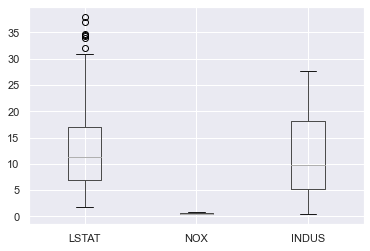

In [10]:
cols = ['LSTAT','NOX','INDUS']
boston.boxplot(column=cols)

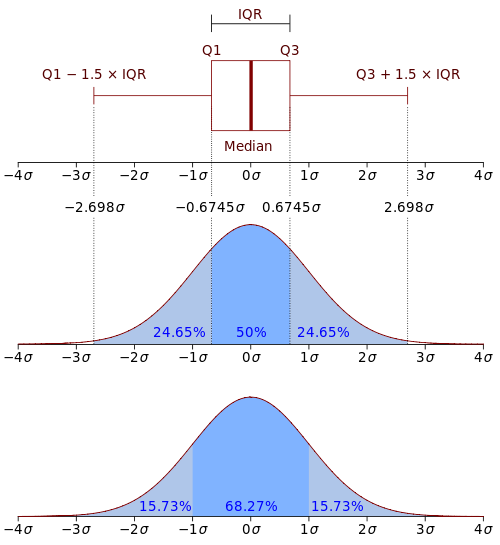

In [11]:
Image(filename='../../image/anomaly/boxplot.png', width=400, height=200)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ebb2b33dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ebb2b45160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ebb2b33f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1ebb2b1ddc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ebb2b1d670>],
 'means': []}

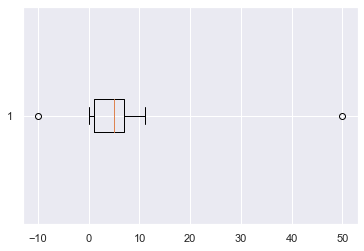

In [12]:
import numpy as np
datapoints= [1,3,5,6,7, 0, 11, 50, -10]
plt.boxplot(datapoints, vert=False)

In [13]:
# calculate IQR -25th(Q1) and 75th(Q3) percentile of the datapoints 
q1, q3= np.percentile(datapoints,[25,75])
#Lower and upper bound for the outliers
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("Outliers for the data points", datapoints, " are any point between",  lower_bound, " and " , upper_bound)
for i in range(len(datapoints)):
    if datapoints[i] > upper_bound or datapoints[i] <lower_bound:
        print(" Outlier data point", datapoints[i])

Outliers for the data points [1, 3, 5, 6, 7, 0, 11, 50, -10]  are any point between -8.0  and  16.0
 Outlier data point 50
 Outlier data point -10


### 확률밀도함수로 이상치 확인

단일변수의 확률밀도 함수를 확인하여 이상치를 p-value로 확인한다

In [14]:
import scipy as sp
sp.stats.norm(loc=0, scale=1) # 평균0, 표준편차 1
rv = sp.stats.norm(loc=0, scale=1)
1 - rv.pdf(1.645)
1- rv.pdf(1.96)
1- rv.pdf(2.58)

0.8968891889080186

0.9415590556665485

0.9856948910058503

가우시안 분포를 가정하여 pdf(probability density distribution)이 임계치를 넘으면 이상치라고 판단

array([[<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'NOX'}>],
       [<AxesSubplot:title={'center':'INDUS'}>, <AxesSubplot:>]],
      dtype=object)

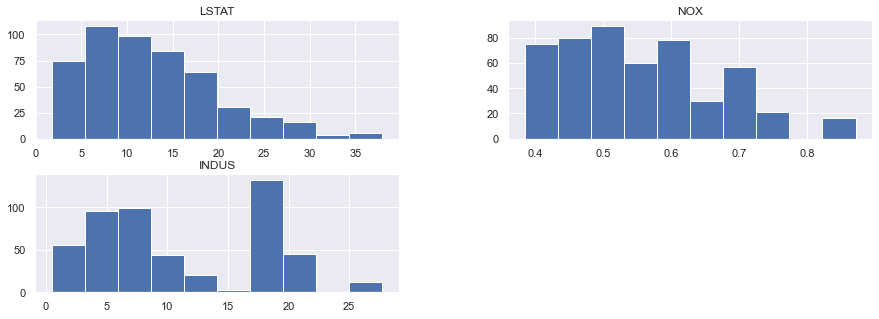

In [15]:
data = boston[cols]
data.hist(figsize=(15,5))

In [16]:
data['LSTAT'] = (data['LSTAT'] -data['LSTAT'].mean())/data['LSTAT'].std()
data['LSTAT_pdf'] = rv.pdf(data['LSTAT'])
data[(data['LSTAT_pdf'] < 0.01) | (data['LSTAT_pdf'] > 0.99)]

,LSTAT,NOX,INDUS,LSTAT_pdf
141,3.046737,0.624,21.89,0.003848
373,3.097150,0.668,18.10,0.003296
374,3.545262,0.668,18.10,0.000744
412,3.041136,0.597,18.10,0.003914
414,3.406628,0.693,18.10,0.001205
438,2.992123,0.740,18.10,0.004538


#  <font color='red'> Novelity detection
## 1. OneClassSVM
- Unsupervised Outlier Detection. Estimate the support of a high-dimensional distribution.
- It is very sensitive to outliers. So it is not very good for outlir detection, but the best option for novelty detection when the training data is not much polluted with outliers.
- It can be applied to high-dimensional data sets.
- There is no undelying assumption in the distribution of the data.

- https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection

In [17]:
from sklearn.svm import OneClassSVM
X = [[0], [0.44], [0.45], [0.46], [1]]

clf = OneClassSVM(gamma='auto').fit(X)
clf.predict(X)

array([-1,  1,  1,  1, -1], dtype=int64)

In [18]:
clf.score_samples(X)

array([1.77987316, 2.05479873, 2.05560497, 2.05615569, 1.73328509])

In [19]:
clf.predict([[-1.2], [0.8], [0.45], [0.46], [2]])

array([-1, -1,  1,  1, -1], dtype=int64)

In [20]:
clf.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.5,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## One-class SVM with non-linear kernel (RBF) : 주로 kernel로 RBF사용 
One Class SVM is a novelty anomaly detection algorithm based on the premise that the training data is not polluted by the outliers and a new observation is detected as an inlier or an outlier. OCSVM is applied for binary classification.

- OCSVM assumes that anomalies can form dense clusters as long as they form a low-density region in the training dataset.
- OCSVM mode is trained in only one class, referred to as the normal class. The model learns all the features and patterns of the normal class 

### <p> <font color= 'blue'> Intuition : One-class SVM is based on SVM. an SVM uses a hyperplane to seperate two classes while a  <b>On-class SVM uses a hypersphere to emcompass all of the observations<b> <p>
https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#one-class-svm-with-non-linear-kernel-rbf

OneClassSVM(gamma=0.1, nu=0.1)

Text(0.5, 1.0, 'Novelty Detection')

(-5.0, 5.0, -5.0, 5.0)

(-5.0, 5.0)

(-5.0, 5.0)

Text(0.5, 0, 'error train: 22/200 ; errors novel regular: 6/40 ; errors novel abnormal: 0/40')

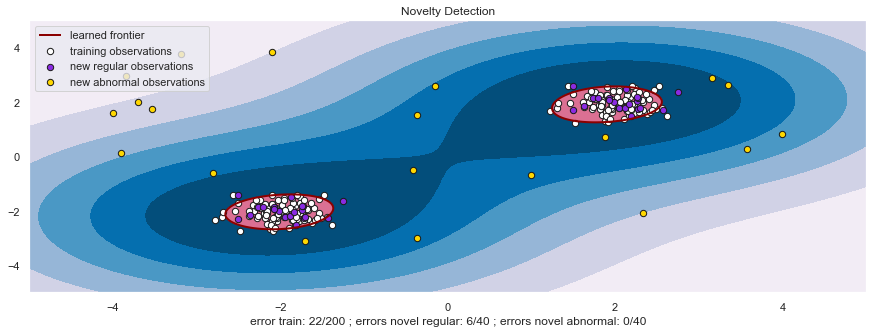

In [21]:
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.font_manager

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(15,5))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

#  <font color='red'> Outlier detection
- Outlier detection is similar to novelty detection in the sense that the goal is to separate a core of regular observations from some polluting ones, called outliers. 
- Yet, in the case of outlier detection, we don’t have a clean data set representing the population of regular observations that can be used to train any tool.

# 1. Elliptic Envelop Algorithm
The Elliptic Envelope is a supervised as well as unsupervised algorithm to model the data as a high dimensional data Gaussian distribution with possible covariance between features. It then finds an Elliptical boundary that contains most of the data points and anything outside the elliptical boundary is an Outlier
- One common way of performing outlier detection is to assume that the regular data come from a known distribution (e.g. data are Gaussian distributed). 
- From this assumption, we generally try to define the “shape” of the data, and can define outlying observations as observations which stand far enough from the fit shape.
- An object for detecting outliers in a Gaussian distributed dataset.
- 데이터의 분포가 가우시안분포를 갖는다는 가정

### <p> <font color= 'blue'> Intuition : We draw an ellipse around the data points based on some criteria and classify any data point inside the ellipse as inliers and any observation outside the ellipse as an outlier.
- no. of samples > no. of features ** 2

One common way of performing outlier detection is to assume that the regular data come from a known distribution (e.g. data are Gaussian distributed). From this assumption, we generally try to define the “shape” of the data, and can define outlying observations as observations which stand far enough from the fit shape.

The scikit-learn provides an object covariance.EllipticEnvelope that fits a robust covariance estimate to the data, and thus fits an ellipse to the central data points, ignoring points outside the central mode.

In [22]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
true_cov = np.array([[.8, .3],
                     [.3, .4]])
X = np.random.RandomState(0).multivariate_normal(mean=[0, 0],
                                                 cov=true_cov,
                                                 size=500)
X[0:10]

array([[-1.61673103, -0.64316019],
       [-1.36314858,  0.51416492],
       [-1.38812887, -1.28529507],
       [-0.78603416, -0.50467625],
       [-0.0056125 ,  0.22487922],
       [-0.46025371,  0.5608042 ],
       [-0.6857151 , -0.29945373],
       [-0.4605907 , -0.06131079],
       [-1.24368003, -0.77946057],
       [-0.073319  , -0.51326387]])

### 1.1 Novelty detection(EllipticEnvelope())

In [23]:
cov = EllipticEnvelope(random_state=0).fit(X)

# predict returns 1 for an inlier and -1 for an outlier
cov.predict([[0, 0],
             [3, 3]])

array([ 1, -1])

### 1.2 Outlier detection(EllipticEnvelope)

In [24]:
cov.predict(X)[0:10]

array([ 1, -1, -1,  1,  1,  1,  1,  1,  1,  1])

In [25]:
cov.covariance_

cov.location_

array([[0.74118335, 0.25357049],
       [0.25357049, 0.30531502]])

array([0.0813539 , 0.04279722])

For instance, assuming that the inlier data are Gaussian distributed, it will estimate the inlier location and covariance in a robust way (i.e. without being influenced by outliers). The Mahalanobis distances obtained from this estimate is used to derive a measure of outlyingness. This strategy is illustrated below.
https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html

### Mahalanobis distance
- https://www.youtube.com/watch?v=spNpfmWZBmg
- https://www.youtube.com/watch?v=xXhLvheEF7o
- The mahalanobis distance is a distance measure between a point and a distribution. It takes into account the correlation between the variables.

In [26]:
# for consistent results
np.random.seed(7)

n_samples = 125
n_outliers = 25
n_features = 2

# generate Gaussian data of shape (125, 2)
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

In [27]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X)
print('Estimated covariance matrix:\n'
      'MCD (Robust):\n{}\n'
      'MLE:\n{}'.format(robust_cov.covariance_, emp_cov.covariance_))

Estimated covariance matrix:
MCD (Robust):
[[ 3.26253567e+00 -3.06695631e-03]
 [-3.06695631e-03  1.22747343e+00]]
MLE:
[[ 3.23773583 -0.24640578]
 [-0.24640578  7.51963999]]


(-4.561265785217095, 10.0)

Text(0.5, 1.0, 'Mahalanobis distances of a contaminated data set')

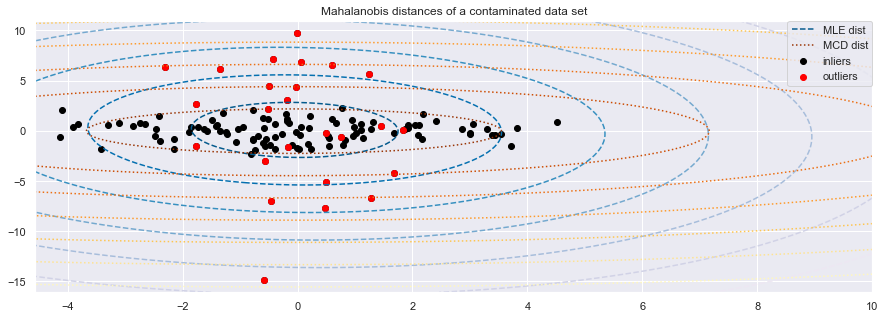

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
# Plot data set
inlier_plot = ax.scatter(X[:, 0], X[:, 1],
                         color='black', label='inliers')
outlier_plot = ax.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                          color='red', label='outliers')
ax.set_xlim(ax.get_xlim()[0], 10.)
ax.set_title("Mahalanobis distances of a contaminated data set")

# Create meshgrid of feature 1 and feature 2 values
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]
# Calculate the MLE based Mahalanobis distances of the meshgrid
mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = plt.contour(xx, yy, np.sqrt(mahal_emp_cov),
                              cmap=plt.cm.PuBu_r, linestyles='dashed')
# Calculate the MCD based Mahalanobis distances
mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = ax.contour(xx, yy, np.sqrt(mahal_robust_cov),
                            cmap=plt.cm.YlOrBr_r, linestyles='dotted')

# Add legend
ax.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
          inlier_plot, outlier_plot],
          ['MLE dist', 'MCD dist', 'inliers', 'outliers'],
          loc="upper right", borderaxespad=0)

plt.show()

To better visualize the difference, we plot contours of the Mahalanobis distances calculated by both methods. Notice that the robust MCD based Mahalanobis distances fit the inlier black points much better, whereas the MLE based distances are more influenced by the outlier red points.

### <font color='red'> 실습 Anomaly Detection using Gaussian Distribution
- Credit card fraud methods have become increasingly sophisticated with use of latest technology today by criminals. It is not a simple task anymore to identify outliers/Anamolous transactions before hand unless reported by the customer
- Lets get the dataframe for the Credit card transation data 

In [29]:
%time df = pd.read_csv('../../data/creditcard.csv')
df = df[['V1', 'V2', 'V3', 'V4', 'V5', 'Class']]
df = df.sample(frac=0.1)
df.head()

Wall time: 1.38 s


,V1,V2,V3,V4,V5,Class
210133,-1.244489,0.108489,0.973635,1.134152,0.528911,0
246364,1.937771,-0.616874,-0.386245,0.352387,-0.742611,0
257436,-0.676848,0.188221,1.093049,-2.320219,0.253972,0
92075,-0.546760,-3.648723,0.052244,-0.322335,-2.435134,0
174068,-0.592921,0.413011,0.196688,-0.211114,2.704736,0


In [30]:
X = df.drop(['Class'], axis=1)
cov = EllipticEnvelope(random_state=0).fit(X)
cov

EllipticEnvelope(random_state=0)

In [31]:
df['Ell'] = cov.predict(X)
df.loc[df['Ell'] == 1, 'Ell'] = 0
df.loc[df['Ell'] == -1, 'Ell'] = 1

In [32]:
df[df['Class'] == df['Ell']].head()
df[df['Class'] != df['Ell']].head()

,V1,V2,V3,V4,V5,Class,Ell
210133,-1.244489,0.108489,0.973635,1.134152,0.528911,0,0
246364,1.937771,-0.616874,-0.386245,0.352387,-0.742611,0,0
257436,-0.676848,0.188221,1.093049,-2.320219,0.253972,0,0
174068,-0.592921,0.413011,0.196688,-0.211114,2.704736,0,0
71475,0.278376,0.790074,0.388767,0.252324,0.426031,0,0


,V1,V2,V3,V4,V5,Class,Ell
92075,-0.546760,-3.648723,0.052244,-0.322335,-2.435134,0,1
238581,-0.860896,-0.585676,-4.136853,-0.154461,-0.120164,0,1
65445,-2.737817,0.426440,0.694096,1.535532,-1.407678,0,1
189389,0.574843,-2.701386,-2.478355,0.463651,0.312697,0,1
279072,-3.341723,-0.733000,0.363989,-1.187261,-0.238747,0,1


In [33]:
df[df['Class'] != df['Ell']].Class.value_counts()

0    2807
1       3
Name: Class, dtype: int64

# 2. Isolation Forest algorithm
- outlier는 희귀할 것이다. 즉 instances의 개수도 적을 뿐만아니라 일반 데이터의 속성값과는 다른 값을 가지고 있을 것이다라는 가정에서 출발
- 그렇다면 tree구조로 단지 몇 번의 가지치기를 통해 아웃라이어를 isolate시킬 수 있지만 일반인스턴스는 아주 여러번의 가기치기를 수고스럽게 isolate켜야 한다.
- It is a tree-based algorithm that is very effective for both outlier and novelty detection in high-dimensional data.
- One efficient way of performing outlier detection in high-dimensional datasets is to use random forests. 
     * Isolation Forest is an unsupervised machine learning algorithm for identifying anomalies within a dataset by isolating anomalies as they are few and different


### <p> <font color= 'blue'> Intuition : We draw an ellipse around the data points based on some criteria and classify any data point inside the ellipse as inliers and any observation outside the ellipse as an outlier.

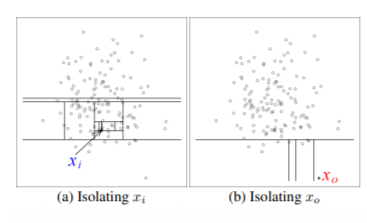

In [34]:
Image(filename='../../image/anomaly/isolating.png', width=400, height=200)

In [35]:
from sklearn.ensemble import IsolationForest
X = np.array([[-1, -1], [-2, -1], [-3, -2], [0, 0], [-20, 50], [3, 5]])
clf = IsolationForest(n_estimators=10, warm_start=True)

clf.fit(X)  # fit 10 trees  

IsolationForest(n_estimators=10, warm_start=True)

The ensemble.IsolationForest supports warm_start=True which allows you to add more trees to an already fitted model:

In [36]:
clf.set_params(n_estimators=20)  # add 10 more trees  

clf.fit(X)  # fit the added trees  

IsolationForest(n_estimators=20, warm_start=True)

IsolationForest(n_estimators=20, warm_start=True)

In [37]:
clf.predict(X)

array([ 1,  1,  1,  1, -1, -1])

https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html
- The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.
- Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.
- This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.
- Random partitioning produces noticeable shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

가지치기는 변수를 무작위로 threshold도 무작위로 마구 해본다

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x1EBB4120640)

Text(0.5, 1.0, 'IsolationForest')

(-5.0, 5.0, -5.0, 5.0)

(-5.0, 5.0)

(-5.0, 5.0)

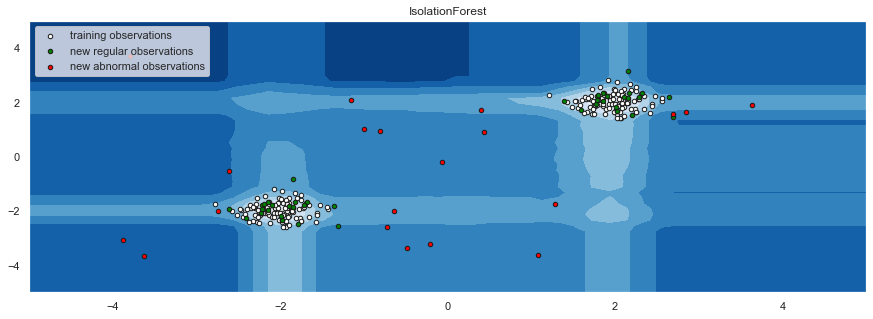

In [38]:
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(15,5))
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

### <font color='red'> 실습 Isolation Forest (boston data)

In [39]:
data = boston[cols]

IsolationForest()

Text(0.5, 1.0, 'LSTAT')

IsolationForest()

Text(0.5, 1.0, 'NOX')

IsolationForest()

Text(0.5, 1.0, 'INDUS')

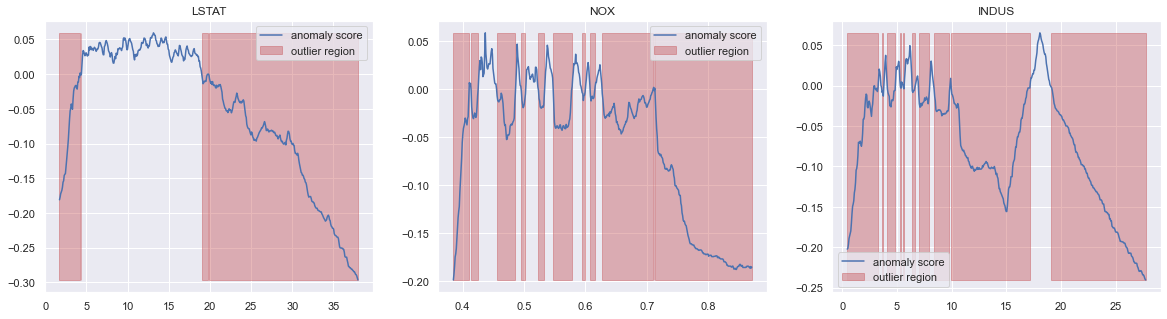

In [40]:
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(boston[column].values.reshape(-1,1))

    xx = np.linspace(boston[column].min(), boston[column].max(), len(boston)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

# 4. Local Outlier Factor : outlier and novelty detection (hyperparameter to True)
- 밀도(density)기반 Clustering알고리즘을 바탕으로 특정 데이터 주변의 Local density로 novelty 점수를 산정한다.

### <p> <font color= 'blue'> Intuition : We draw an ellipse around the data points based on some criteria and classify any data point inside the ellipse as inliers and any observation outside the ellipse as an outlier.

## 4.1 Outlier detection
- lof=LocalOutlierFactor()
- lof.fit(X_train)
- lof.predict(X_train)

In [41]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(n_neighbors=1)

In [42]:
print(neigh.kneighbors([[1., 1., 1.]]))

(array([[0.5]]), array([[2]], dtype=int64))


This means that the element is at distance 0.5 and is the third element of samples (indexes start at 0)

## 4.2 Novelty detection
To use neighbors.LocalOutlierFactor for novelty detection, i.e. predict labels or compute the score of abnormality of new unseen data, you need to instantiate the estimator with the novelty parameter set to True before fitting the estimator: 
- lof=LocalOutlierFactor(novelty=True)
- lof.fit(X_train)
- lof.predict(X_new)

In [43]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = [[-1.1], [0.2], [101.1], [0.3]]
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(X)

clf.negative_outlier_factor_

array([ 1,  1, -1,  1])

array([ -0.98214286,  -1.03703704, -73.36970899,  -0.98214286])

# End

- Theimplementation of all techniques is quite similar except for LOF where the differencebetween outlier detection and novelty detection comes into play. 
- The Isolation Forest and LOF work well on high-dimensional data. For the purpose of visualization, we can apply the Principal Component Analysis to reduce thedimensionality of high-dimensional data.
- The Elliptic Envelope should only be used with data that satisfy the assumption ofnormality.
   * The most important hyperparameter in the Elliptic Envelope, Isolation Forest and LOF is the contamination hyperparameter. It represents the proportion of outliers in thedataset. In most cases, we do not know the exact value for the contamination hyperparameter. 
   * The best way to guess the value is that first do IQR-based detectionand count the number of outliers in the dataset.As you know the total of observations, you can get anapproximate value for the proportion of outliers. This is the value for the contamination hyperparameter!
- The One-class SVM is not very good for outlier detection, but the best option fornovelty detection when the training data is not much polluted with outliers. 